In [ ]:
# 필요한 모든 패키지 로드
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:
raw_data = pd.read_csv("sleepdata_2.csv", sep=';')

In [ ]:
raw_data.head()

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,92%,NaN,0,6578,Normal,NaN,NaN,...,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,94%,NaN,0,4913,Normal,NaN,NaN,...,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


In [ ]:
activ_data = raw_data.iloc[:, [2, 6]]

In [ ]:
activ_data["Sleep Quality"] = activ_data["Sleep Quality"].str.rstrip("%").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
activ_data.sort_values("Sleep Quality")

,Sleep Quality,Steps
382,7,9737
563,7,3559
917,9,495
843,10,0
383,17,9737
...,...,...
225,100,7169
391,100,6266
403,100,4424
155,100,7488


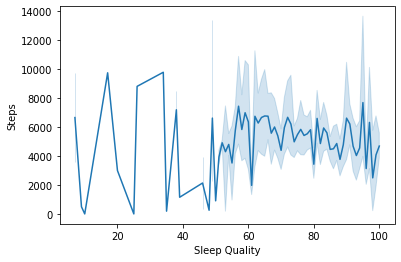

In [ ]:
sns.lineplot(data = activ_data, x = 'Sleep Quality', y = 'Steps')

In [ ]:
sleeptime_data = raw_data.iloc[:, [2, 12]]

In [ ]:
sleeptime_data["Sleep Quality"] = sleeptime_data["Sleep Quality"].str.rstrip("%").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sleeptime_data.sort_values("Sleep Quality")

,Sleep Quality,Time asleep (seconds)
382,7,1815.8
563,7,2798.3
917,9,0.0
843,10,0.0
383,17,4571.2
...,...,...
225,100,31535.7
391,100,34922.2
403,100,30209.2
155,100,27905.9


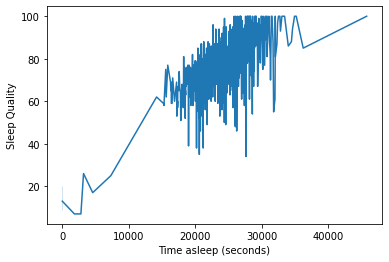

In [ ]:
sns.lineplot(data = sleeptime_data, x = 'Time asleep (seconds)', y = 'Sleep Quality')

In [ ]:
weather_data = raw_data.iloc[:, [2, 19]]

In [ ]:
weather_data["Sleep Quality"] = weather_data["Sleep Quality"].str.rstrip("%").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
weather_data.sort_values("Sleep Quality")

,Sleep Quality,Weather type
382,7,Sunny
563,7,No weather
917,9,Cloudy
843,10,Snow
383,17,Sunny
...,...,...
225,100,No weather
391,100,No weather
403,100,No weather
155,100,No weather


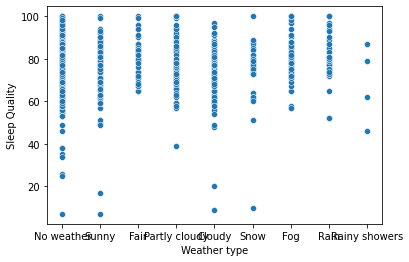

In [ ]:
sns.scatterplot(data = weather_data, x = 'Weather type', y = 'Sleep Quality')